In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
df=pd.read_csv('C:/Users/uongt/Downloads/orders_1458368.csv')
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
df.head(10)

,Unnamed: 0,tinh_thanhpho,loai_san_pham,thoi_gian,so_tien_thanh_toan,kenh_mua_ban,do_uu_tien,tien_ship,can_nang,chieu_cao,chieu_dai,chieu_rong
0,0,Đà Nẵng,Điện Thoại,02/09/2014 03:02 AM,7951000,Lazada,Trung bình,65000,10.053154,4.608990,3.378163,5.489578
1,1,Bình Định,Thời trang nữ,03/23/2018 11:10 PM,6057000,Offline,Thấp,128000,10.074268,5.352235,4.134053,3.961462
2,2,Hải Dương,Gia Dụng,04/04/2019 10:14 PM,415000,Thegioididong,Thấp,99000,4.066475,2.757206,0.949298,4.151385
3,3,Hải Dương,Máy Ảnh,07/13/2015 06:41 PM,6033000,Shopee,Trung bình,65000,6.836190,2.263171,5.141840,2.708288
4,4,Bình Thuận,Thiết Bị Số,03/06/2020 06:29 AM,2118000,Shopee,Cao,164000,5.691333,1.045574,1.339470,0.923981
5,5,Tiền Giang,Thiết Bị Số,04/28/2017 06:51 PM,7389000,Offline,Trung bình,87000,1.083499,3.933194,2.551464,1.611047
6,6,Hải Dương,Đồng hồ,01/14/2016 09:22 AM,2143000,Shopee,Cao,88000,5.054554,0.798063,3.313844,0.996138
7,7,Hải Dương,Thiết Bị Số,03/06/2018 01:55 PM,9410000,Offline,Thấp,38000,6.358646,2.741359,1.407538,5.476155
8,8,Hà Giang,Gia Dụng,01/21/2015 02:36 AM,7826000,Thegioididong,Trung bình,31000,4.579716,1.193281,3.195406,4.095716
9,9,Gia Lai,Điện Thoại,09/01/2019 11:28 AM,3605000,Khac,Trung bình,161000,3.253028,4.541987,2.723973,3.475480


In [4]:
df= df[["tinh_thanhpho","loai_san_pham","thoi_gian","so_tien_thanh_toan","kenh_mua_ban","do_uu_tien"]]
df['id']=range(1,1+len(df))
df['thoi_gian'] = pd.to_datetime(df.thoi_gian)
df['nam'] = df.thoi_gian.dt.strftime('%Y')
df['thoi_gian'] = df.thoi_gian.dt.strftime('%d/%m/%Y')
df.head(5)
df.info()

,tinh_thanhpho,loai_san_pham,thoi_gian,so_tien_thanh_toan,kenh_mua_ban,do_uu_tien,id,nam
0,Đà Nẵng,Điện Thoại,09/02/2014,7951000,Lazada,Trung bình,1,2014
1,Bình Định,Thời trang nữ,23/03/2018,6057000,Offline,Thấp,2,2018
2,Hải Dương,Gia Dụng,04/04/2019,415000,Thegioididong,Thấp,3,2019
3,Hải Dương,Máy Ảnh,13/07/2015,6033000,Shopee,Trung bình,4,2015
4,Bình Thuận,Thiết Bị Số,06/03/2020,2118000,Shopee,Cao,5,2020


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458368 entries, 0 to 1458367
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   tinh_thanhpho       1458368 non-null  object
 1   loai_san_pham       1458368 non-null  object
 2   thoi_gian           1458368 non-null  object
 3   so_tien_thanh_toan  1458368 non-null  int64 
 4   kenh_mua_ban        1458368 non-null  object
 5   do_uu_tien          1458368 non-null  object
 6   id                  1458368 non-null  int32 
 7   nam                 1458368 non-null  object
dtypes: int32(1), int64(1), object(6)
memory usage: 83.4+ MB


In [5]:
df1=df.groupby(["tinh_thanhpho","loai_san_pham","thoi_gian","kenh_mua_ban"]).agg({'id':'count','so_tien_thanh_toan':'sum'}).reset_index()
df1.head(10)

,tinh_thanhpho,loai_san_pham,thoi_gian,kenh_mua_ban,id,so_tien_thanh_toan
0,Bình Thuận,Gia Dụng,01/01/2015,Khac,1,4261000
1,Bình Thuận,Gia Dụng,01/01/2015,Lazada,2,5442000
2,Bình Thuận,Gia Dụng,01/01/2015,Offline,1,3153000
3,Bình Thuận,Gia Dụng,01/01/2015,Shopee,1,1476000
4,Bình Thuận,Gia Dụng,01/01/2015,Thegioididong,1,6985000
5,Bình Thuận,Gia Dụng,01/01/2016,Khac,1,7976000
6,Bình Thuận,Gia Dụng,01/01/2016,Offline,1,5467000
7,Bình Thuận,Gia Dụng,01/01/2016,Thegioididong,1,7936000
8,Bình Thuận,Gia Dụng,01/01/2017,Offline,1,665000
9,Bình Thuận,Gia Dụng,01/01/2017,Thegioididong,1,3829000


In [6]:
df2=df.groupby(["tinh_thanhpho","loai_san_pham","nam","kenh_mua_ban"]).agg({'id':'count','so_tien_thanh_toan':'sum'}).reset_index()
df2.head(10)

,tinh_thanhpho,loai_san_pham,nam,kenh_mua_ban,id,so_tien_thanh_toan
0,Bình Thuận,Gia Dụng,2014,Khac,173,894908000
1,Bình Thuận,Gia Dụng,2014,Lazada,154,773402000
2,Bình Thuận,Gia Dụng,2014,Offline,155,807544000
3,Bình Thuận,Gia Dụng,2014,Shopee,145,684225000
4,Bình Thuận,Gia Dụng,2014,Thegioididong,129,719993000
5,Bình Thuận,Gia Dụng,2014,Tiki,127,649426000
6,Bình Thuận,Gia Dụng,2015,Khac,137,679688000
7,Bình Thuận,Gia Dụng,2015,Lazada,155,770802000
8,Bình Thuận,Gia Dụng,2015,Offline,149,722875000
9,Bình Thuận,Gia Dụng,2015,Shopee,163,779181000


In [7]:
df1['trung_binh']=df1['so_tien_thanh_toan']/df1['id']
df1.head(10)

,tinh_thanhpho,loai_san_pham,thoi_gian,kenh_mua_ban,id,so_tien_thanh_toan,trung_binh
0,Bình Thuận,Gia Dụng,01/01/2015,Khac,1,4261000,4261000.0
1,Bình Thuận,Gia Dụng,01/01/2015,Lazada,2,5442000,2721000.0
2,Bình Thuận,Gia Dụng,01/01/2015,Offline,1,3153000,3153000.0
3,Bình Thuận,Gia Dụng,01/01/2015,Shopee,1,1476000,1476000.0
4,Bình Thuận,Gia Dụng,01/01/2015,Thegioididong,1,6985000,6985000.0
5,Bình Thuận,Gia Dụng,01/01/2016,Khac,1,7976000,7976000.0
6,Bình Thuận,Gia Dụng,01/01/2016,Offline,1,5467000,5467000.0
7,Bình Thuận,Gia Dụng,01/01/2016,Thegioididong,1,7936000,7936000.0
8,Bình Thuận,Gia Dụng,01/01/2017,Offline,1,665000,665000.0
9,Bình Thuận,Gia Dụng,01/01/2017,Thegioididong,1,3829000,3829000.0


In [8]:
df2['trung_binh']=df2['so_tien_thanh_toan']/df2['id']
df2.head(10)

,tinh_thanhpho,loai_san_pham,nam,kenh_mua_ban,id,so_tien_thanh_toan,trung_binh
0,Bình Thuận,Gia Dụng,2014,Khac,173,894908000,5.172879e+06
1,Bình Thuận,Gia Dụng,2014,Lazada,154,773402000,5.022091e+06
2,Bình Thuận,Gia Dụng,2014,Offline,155,807544000,5.209961e+06
3,Bình Thuận,Gia Dụng,2014,Shopee,145,684225000,4.718793e+06
4,Bình Thuận,Gia Dụng,2014,Thegioididong,129,719993000,5.581341e+06
5,Bình Thuận,Gia Dụng,2014,Tiki,127,649426000,5.113591e+06
6,Bình Thuận,Gia Dụng,2015,Khac,137,679688000,4.961226e+06
7,Bình Thuận,Gia Dụng,2015,Lazada,155,770802000,4.972916e+06
8,Bình Thuận,Gia Dụng,2015,Offline,149,722875000,4.851510e+06
9,Bình Thuận,Gia Dụng,2015,Shopee,163,779181000,4.780252e+06


<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='loai_san_pham', ylabel='so_tien_thanh_toan'>

Text(0.5, 1.0, 'Loại sản phẩm cho từng kênh mua bán')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Điện Thoại'),
  Text(1, 0, 'Thời trang nữ'),
  Text(2, 0, 'Gia Dụng'),
  Text(3, 0, 'Máy Ảnh'),
  Text(4, 0, 'Thiết Bị Số'),
  Text(5, 0, 'Đồng hồ'),
  Text(6, 0, 'Nhà Cửa'),
  Text(7, 0, 'Laptop'),
  Text(8, 0, 'Điện Tử'),
  Text(9, 0, 'Thể Thao'),
  Text(10, 0, 'Thịt, rau củ'),
  Text(11, 0, 'Phụ kiện')])

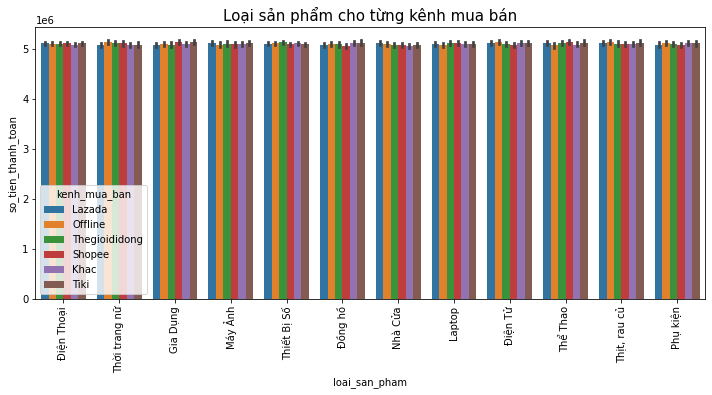

In [10]:
plt.figure(figsize=(12, 5))

sns.barplot(x='loai_san_pham',y='so_tien_thanh_toan', data=df, hue='kenh_mua_ban')
plt.title("Loại sản phẩm cho từng kênh mua bán", fontsize=15)
plt.xticks(rotation=90)

<Figure size 864x360 with 0 Axes>

<BarContainer object of 8660 artists>

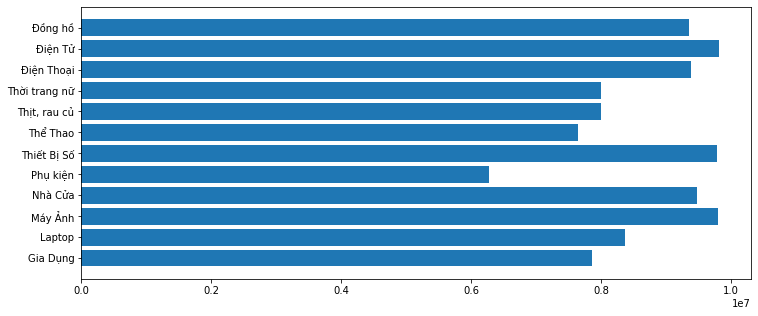

In [11]:
plt.figure(figsize=(12, 5))
plt.barh(df2['loai_san_pham'],df2['trung_binh'])
plt.show()

<Figure size 720x360 with 0 Axes>

<BarContainer object of 8660 artists>

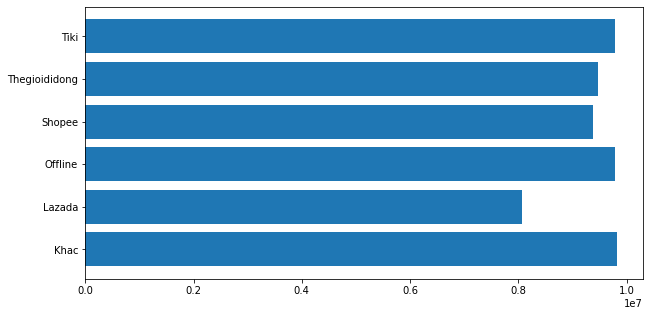

In [12]:
plt.figure(figsize=(10, 5))
plt.barh(df2['kenh_mua_ban'],df2['trung_binh'])
plt.show()

<Figure size 1080x360 with 0 Axes>

<BarContainer object of 8660 artists>

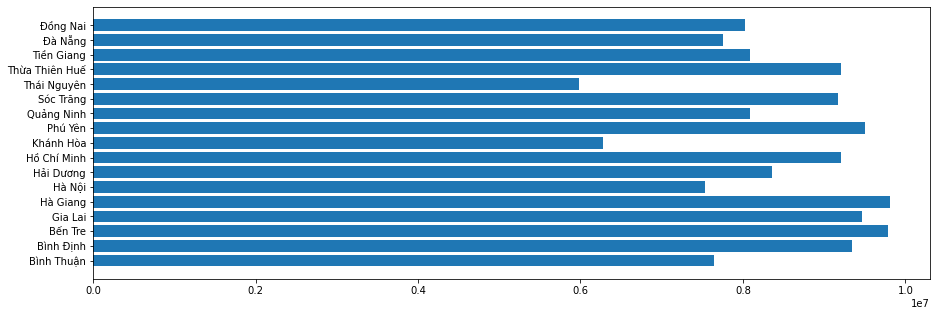

In [13]:
plt.figure(figsize=(15, 5))
plt.barh(df2['tinh_thanhpho'],df2['trung_binh'])
plt.show()

,tinh_thanhpho,loai_san_pham,nam,kenh_mua_ban,id,so_tien_thanh_toan,trung_binh
30,Bình Thuận,Gia Dụng,2019,Khac,140,748723000,5.348021e+06
31,Bình Thuận,Gia Dụng,2019,Lazada,166,787341000,4.743018e+06
32,Bình Thuận,Gia Dụng,2019,Offline,140,781113000,5.579379e+06


<Figure size 864x360 with 0 Axes>

<BarContainer object of 1224 artists>

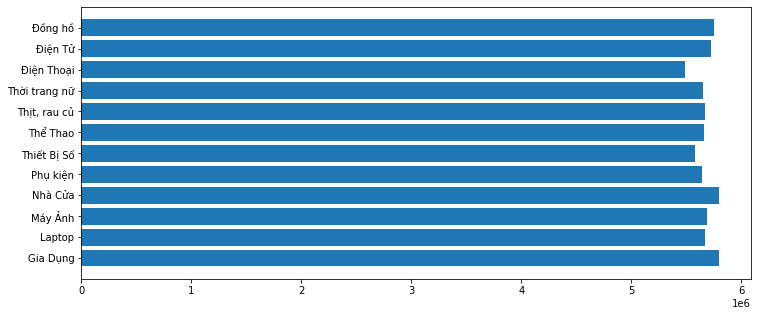

<Figure size 864x360 with 0 Axes>

<BarContainer object of 1224 artists>

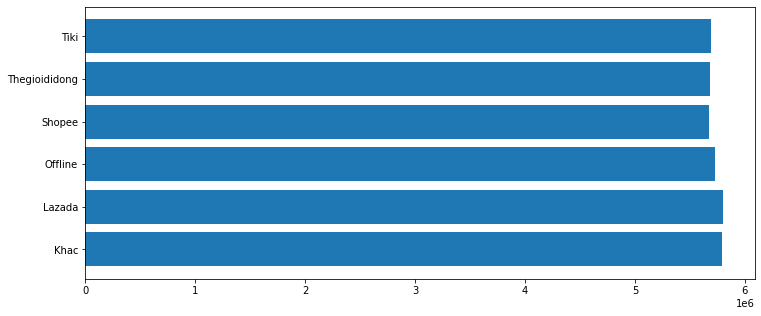

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='loai_san_pham', ylabel='trung_binh'>

Text(0.5, 1.0, 'Loại sản phẩm cho từng kênh mua bán')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gia Dụng'),
  Text(1, 0, 'Laptop'),
  Text(2, 0, 'Máy Ảnh'),
  Text(3, 0, 'Nhà Cửa'),
  Text(4, 0, 'Phụ kiện'),
  Text(5, 0, 'Thiết Bị Số'),
  Text(6, 0, 'Thể Thao'),
  Text(7, 0, 'Thịt, rau củ'),
  Text(8, 0, 'Thời trang nữ'),
  Text(9, 0, 'Điện Thoại'),
  Text(10, 0, 'Điện Tử'),
  Text(11, 0, 'Đồng hồ')])

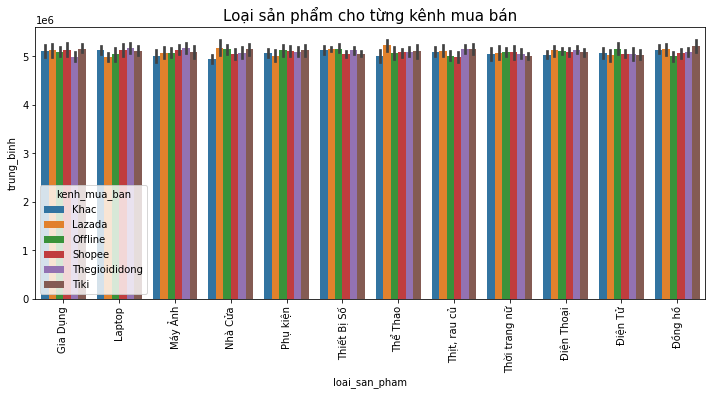

In [14]:
df3=df2[df2['nam']=='2019']
df3.head(3)
plt.figure(figsize=(12, 5))
plt.barh(df3['loai_san_pham'],df3['trung_binh'])
plt.show()


plt.figure(figsize=(12, 5))
plt.barh(df3['kenh_mua_ban'],df3['trung_binh'])
plt.show()
plt.figure(figsize=(12, 5))

sns.barplot(x='loai_san_pham',y='trung_binh', data=df3, hue='kenh_mua_ban')
plt.title("Loại sản phẩm cho từng kênh mua bán", fontsize=15)
plt.xticks(rotation=90)

,tinh_thanhpho,loai_san_pham,nam,kenh_mua_ban,id,so_tien_thanh_toan,trung_binh
36,Bình Thuận,Gia Dụng,2020,Khac,147,754108000,5.129986e+06
37,Bình Thuận,Gia Dụng,2020,Lazada,140,707663000,5.054736e+06
38,Bình Thuận,Gia Dụng,2020,Offline,151,765521000,5.069675e+06


<Figure size 864x360 with 0 Axes>

<BarContainer object of 1224 artists>

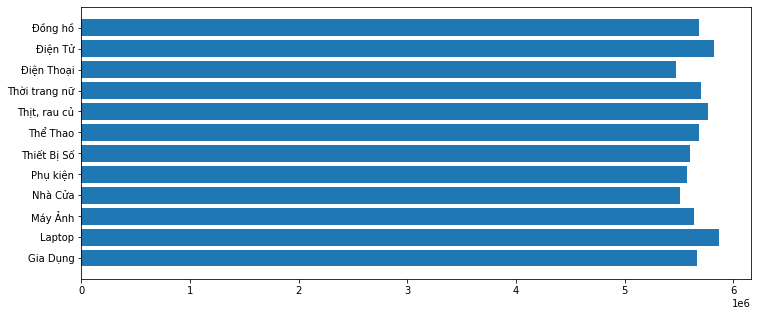

<Figure size 864x360 with 0 Axes>

<BarContainer object of 1224 artists>

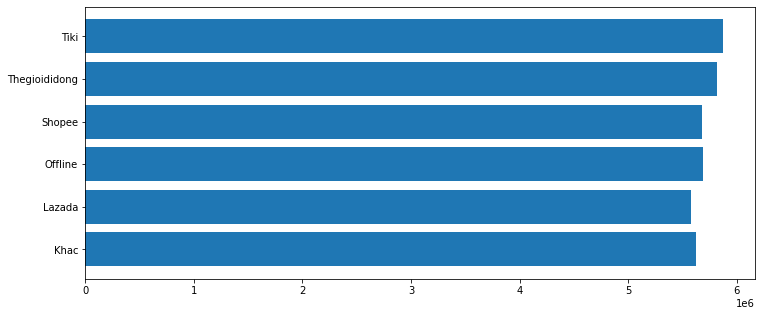

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='loai_san_pham', ylabel='trung_binh'>

Text(0.5, 1.0, 'Loại sản phẩm cho từng kênh mua bán')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gia Dụng'),
  Text(1, 0, 'Laptop'),
  Text(2, 0, 'Máy Ảnh'),
  Text(3, 0, 'Nhà Cửa'),
  Text(4, 0, 'Phụ kiện'),
  Text(5, 0, 'Thiết Bị Số'),
  Text(6, 0, 'Thể Thao'),
  Text(7, 0, 'Thịt, rau củ'),
  Text(8, 0, 'Thời trang nữ'),
  Text(9, 0, 'Điện Thoại'),
  Text(10, 0, 'Điện Tử'),
  Text(11, 0, 'Đồng hồ')])

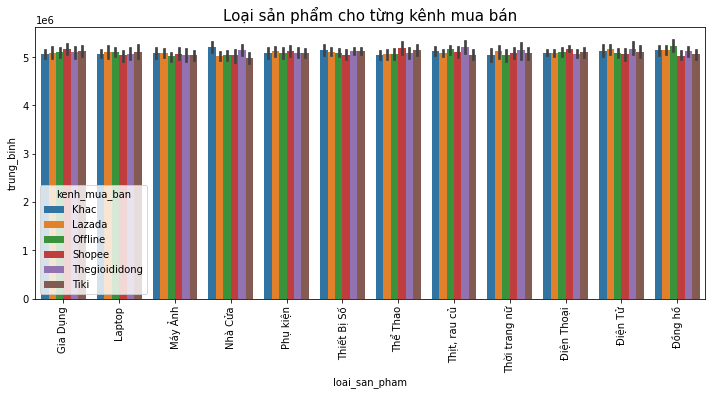

In [15]:
df3=df2[df2['nam']=='2020']
df3.head(3)
plt.figure(figsize=(12, 5))
plt.barh(df3['loai_san_pham'],df3['trung_binh'])
plt.show()

plt.figure(figsize=(12, 5))
plt.barh(df3['kenh_mua_ban'],df3['trung_binh'])
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='loai_san_pham',y='trung_binh', data=df3, hue='kenh_mua_ban')
plt.title("Loại sản phẩm cho từng kênh mua bán", fontsize=15)
plt.xticks(rotation=90)

,tinh_thanhpho,loai_san_pham,nam,kenh_mua_ban,id,so_tien_thanh_toan,trung_binh
42,Bình Thuận,Gia Dụng,2021,Lazada,1,3494000,3494000.0
43,Bình Thuận,Gia Dụng,2021,Thegioididong,1,3809000,3809000.0
44,Bình Thuận,Gia Dụng,2021,Tiki,1,2608000,2608000.0


<Figure size 864x360 with 0 Axes>

<BarContainer object of 92 artists>

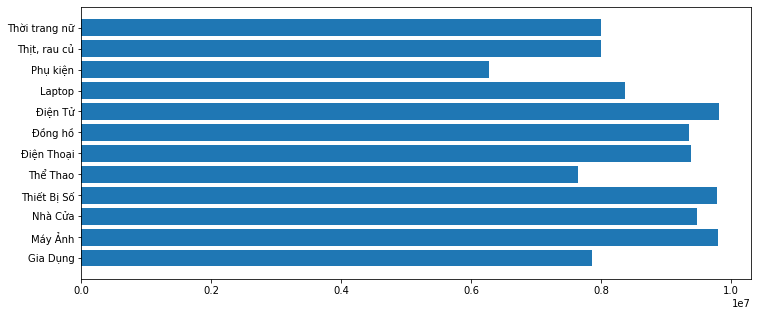

<Figure size 864x360 with 0 Axes>

<BarContainer object of 92 artists>

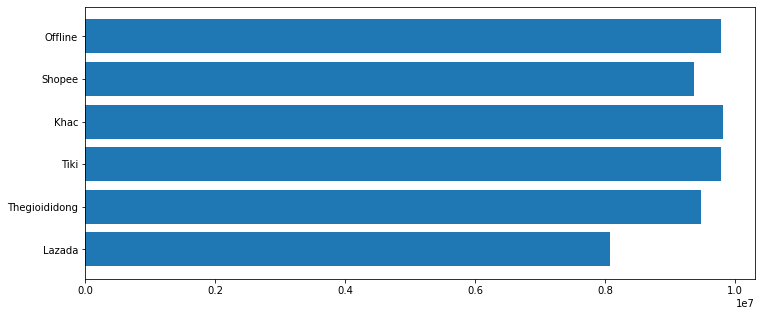

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='loai_san_pham', ylabel='trung_binh'>

Text(0.5, 1.0, 'Loại sản phẩm cho từng kênh mua bán')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gia Dụng'),
  Text(1, 0, 'Máy Ảnh'),
  Text(2, 0, 'Nhà Cửa'),
  Text(3, 0, 'Thiết Bị Số'),
  Text(4, 0, 'Thể Thao'),
  Text(5, 0, 'Điện Thoại'),
  Text(6, 0, 'Đồng hồ'),
  Text(7, 0, 'Điện Tử'),
  Text(8, 0, 'Laptop'),
  Text(9, 0, 'Phụ kiện'),
  Text(10, 0, 'Thịt, rau củ'),
  Text(11, 0, 'Thời trang nữ')])

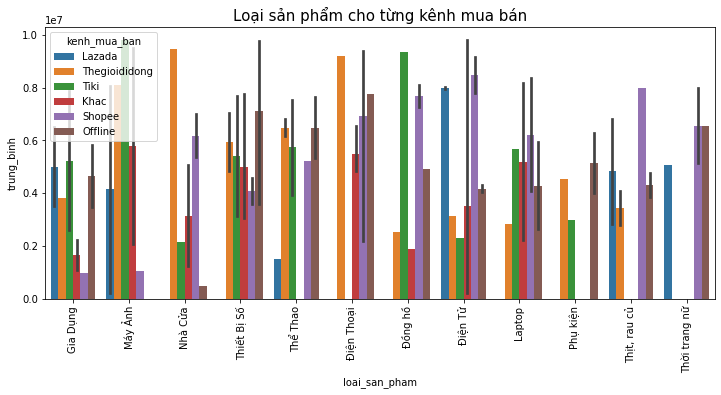

In [16]:
df3=df2[df2['nam']=='2021']
df3.head(3)
plt.figure(figsize=(12, 5))
plt.barh(df3['loai_san_pham'],df3['trung_binh'])
plt.show()

plt.figure(figsize=(12, 5))
plt.barh(df3['kenh_mua_ban'],df3['trung_binh'])
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x='loai_san_pham',y='trung_binh', data=df3, hue='kenh_mua_ban')
plt.title("Loại sản phẩm cho từng kênh mua bán", fontsize=15)
plt.xticks(rotation=90)